In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
ds = pd.read_csv("E:/dev/ml_course_rv/ml_course_homework/Barcelona_rent_price.csv")

In [9]:
ds.head()

,Year,Trimester,District,Neighbourhood,Average _rent,Price
0,2014,1,Ciutat Vella,el Raval,average rent (euro/month),589.55
1,2014,1,Ciutat Vella,Gothic Quarter,average rent (euro/month),712.79
2,2014,1,Ciutat Vella,la Barceloneta,average rent (euro/month),540.71
3,2014,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",average rent (euro/month),673.44
4,2014,1,Eixample,Fort Pienc,average rent (euro/month),736.09


In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           4622 non-null   int64  
 1   Trimester      4622 non-null   int64  
 2   District       4622 non-null   object 
 3   Neighbourhood  4622 non-null   object 
 4   Average _rent  4622 non-null   object 
 5   Price          4622 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 216.8+ KB


In [20]:
district_iso = ds.loc[(ds['District'] == "Gracia")]

In [21]:
district_iso.head()


,Year,Trimester,District,Neighbourhood,Average _rent,Price
26,2014,1,Gracia,Vallcarca i els Penitents,average rent (euro/month),679.66
27,2014,1,Gracia,el Coll,average rent (euro/month),583.93
28,2014,1,Gracia,la Salut,average rent (euro/month),634.48
29,2014,1,Gracia,la Vila de Gracia,average rent (euro/month),679.80
30,2014,1,Gracia,el Camp d'en Grassot i Gracia Nova,average rent (euro/month),671.00


<Axes: xlabel='Year', ylabel='Price'>

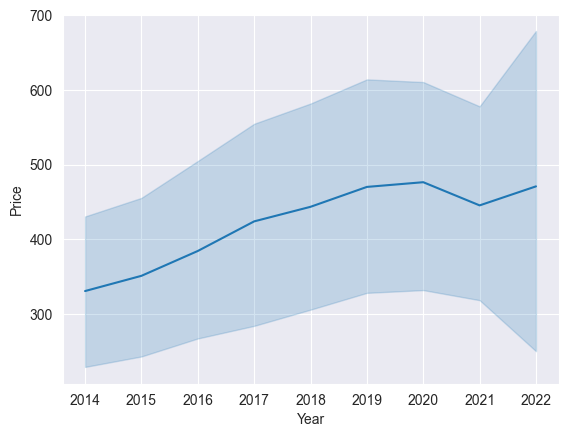

In [23]:
sns.lineplot(x="Year", y="Price", data=district_iso)

<Figure size 4000x2800 with 0 Axes>

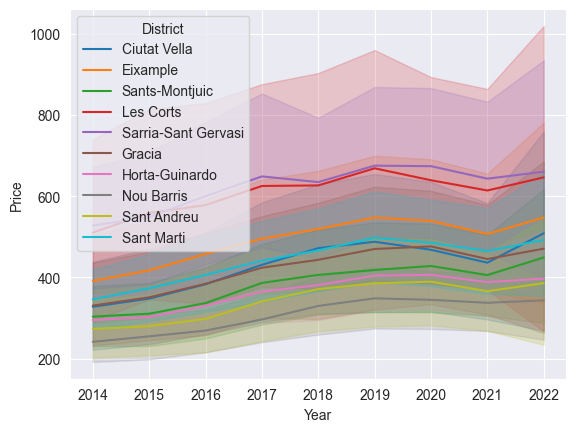

<Figure size 4000x2800 with 0 Axes>

In [32]:
sns.lineplot(x="Year", y="Price", data=ds, hue="District")
plt.figure(figsize=(40, 28))

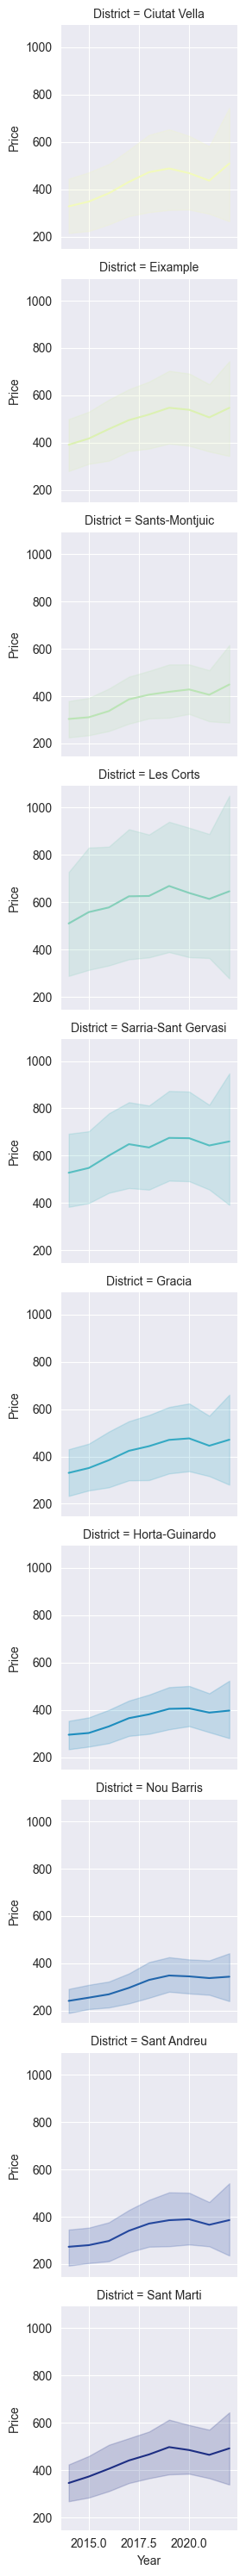

In [46]:
g = sns.FacetGrid(ds, row= "District", hue = "District", palette = "YlGnBu")
g.map(sns.lineplot, "Year", "Price")

<Axes: xlabel='Year', ylabel='Price'>

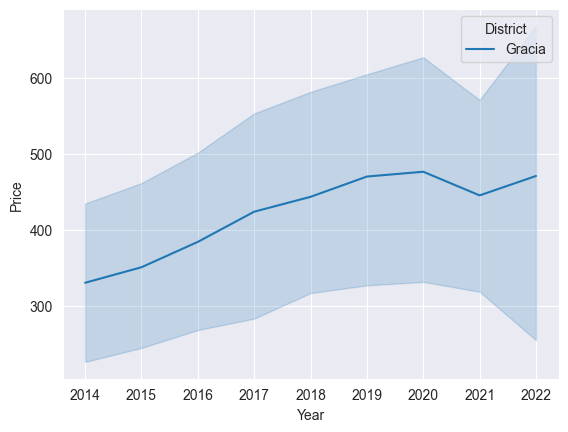

In [51]:
sns.lineplot(x="Year", y="Price", data=district_iso, hue="District")

In [189]:
clean_data = district_iso[["Year", "Price"]]
#clean_data= clean_data.loc[(clean_data['Year'] < 2020)]
clean_data= clean_data.loc[(clean_data['Price'] > 100)]
#clean_data.iloc[clean_data.Price.argmax()]

In [190]:
clean_data.head()

,Year,Price
26,2014,679.66
27,2014,583.93
28,2014,634.48
29,2014,679.80
30,2014,671.00


In [191]:
clean_data.tail()

,Year,Price
4513,2022,969.3
4514,2022,759.2
4515,2022,1010.3
4516,2022,982.6
4517,2022,977.8


In [192]:
clean_data.describe()

,Year,Price
count,170.000000,170.000000
mean,2017.764706,824.909647
std,2.469444,123.576290
min,2014.000000,537.150000
25%,2016.000000,741.245000
50%,2018.000000,840.335000
75%,2020.000000,926.920000
max,2022.000000,1060.500000


In [193]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 26 to 4517
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    170 non-null    int64  
 1   Price   170 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [194]:
from sklearn.model_selection import train_test_split

<Axes: xlabel='Year', ylabel='Price'>

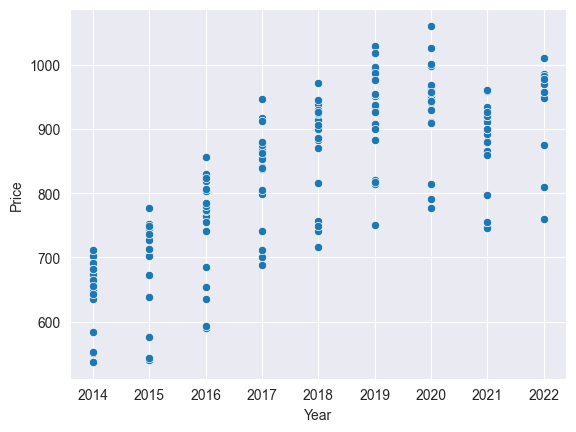

In [195]:
sns.scatterplot(x="Year", y="Price", data=clean_data)

In [196]:
X = clean_data[["Year"]]
y = clean_data[["Price"]]

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
from sklearn.linear_model import LinearRegression

In [200]:
linear_model = LinearRegression()

In [204]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [205]:
year = 2030

In [206]:
predicted_rent=linear_model.predict([[year]])

C:\Users\Kris\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [207]:
print(predicted_rent)

[[1264.18708212]]


In [212]:
grp_y2022 = clean_data.loc[(clean_data['Year'] == 2022)]

In [216]:
grp_y2022.describe()

,Year,Price
count,10.0,10.000000
mean,2022.0,927.510000
std,0.0,84.269784
min,2022.0,759.200000
25%,2022.0,892.675000
50%,2022.0,963.600000
75%,2022.0,981.400000
max,2022.0,1010.300000
